Title: "Elementary and high school students performance and relation to the district education finance " -GA Final Project Research proposal
Author: Yu Zhang
output: 

1. Introduction

In the discussion of K-12 students' success, the issue of financing is prominent from the perspective of various stakeholders. Policymakers are engaged in asking how much public purse should be devoted to elementary and high school students related to competing demands on tuition, expenditure, and transportation. Federal education and census are concerned about the financial capacity to provide quality education and sustain the living hood. Besides, the family and students concerned about how they pay for education can guarantee the students' success beyond elementary and high school. 

In observing the NAEP (National Assessment of Educational Progress) data and Educational financing data from the National Finance Census (National Center for Educational Statistics), we have been known the educational finance can be characterized by the goals of students' academic success, and by a strong influence by the financial capacity, by and large, we might predict the elementary and high school students academic success on mathematics and literacy to be influenced by the features of family and federal educational financing, this is for example, highly praise by educational scholar and researcher Joan Herman'description: "the keys resources, educational financing have been imposed the role to expand the enrollment and institutes. On the performance standards, the evaluation can be introduced to predict the student's performance"(2011). 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
%matplotlib inline

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")


from sklearn.linear_model import LinearRegression

In [2]:
districts = pd.read_csv("./data/districts.csv", sep=',')
naep = pd.read_csv("./data/naep.csv", sep=',')

In [3]:
edu = pd.read_csv("./data/edu_data.csv")

In [3]:
districts.head()

,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
0,Alabama,9609.0,AUTAUGA COUNTY SCHOOL DISTRICT,2016,80867,7447,53842,19578,76672,43843,23941,6401.0,1506
1,Alabama,30931.0,BALDWIN COUNTY SCHOOL DISTRICT,2016,338236,23710,145180,169346,299880,164977,97231,19439.0,9749
2,Alabama,912.0,BARBOUR COUNTY SCHOOL DISTRICT,2016,10116,2342,5434,2340,10070,4907,3896,975.0,110
3,Alabama,2842.0,EUFAULA CITY SCHOOL DISTRICT,2016,26182,3558,15900,6724,29843,15302,7901,2274.0,4133
4,Alabama,3322.0,BIBB COUNTY SCHOOL DISTRICT,2016,32486,3664,21846,6976,31662,16407,11087,3122.0,486


In [4]:
districts.columns=('state', 'enrollment', 'name', 'year', 'total_revenue','federal_revenue', 'state_revenue', 'local_revenue', 'expenditure', 'current_spending_instruction','current_spending','other_spending','total_capital')

In [5]:
districts_new = districts[['state', 'enrollment', 'year', 'total_revenue','federal_revenue', 'state_revenue', 'local_revenue', 'expenditure', 'current_spending_instruction','current_spending','other_spending','total_capital']]

In [6]:
districts.shape

(374161, 13)

In [7]:
districts_new1 = districts.dropna()

In [8]:
districts_new2 = districts_new1.groupby(['year','state','name']).agg(['mean']).reset_index()

In [9]:
districts_new2.shape

(356945, 13)

In [10]:
districts_new2.head()

,year,state,name,enrollment,total_revenue,federal_revenue,state_revenue,local_revenue,expenditure,current_spending_instruction,current_spending,other_spending,total_capital
,,,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,1993,Alabama,ALBERTVILLE CITY SCH DIST,3011.0,11101.0,879.0,7403.0,2819.0,11318.0,6567.0,3353.0,1014.0,383.0
1,1993,Alabama,ALEXANDER CITY SCH DIST,3748.0,14406.0,982.0,8949.0,4475.0,15015.0,7988.0,4113.0,1046.0,1662.0
2,1993,Alabama,ANDALUSIA CTY SCH DIST,2136.0,7749.0,949.0,5023.0,1777.0,7940.0,5095.0,1981.0,646.0,218.0
3,1993,Alabama,ANNISTON CTY SCH DST,4164.0,17714.0,3084.0,10615.0,4015.0,17679.0,9508.0,5890.0,1864.0,333.0
4,1993,Alabama,ARAB CIT SCHOOL DIST,2485.0,8296.0,492.0,5834.0,1970.0,8161.0,5278.0,2033.0,590.0,260.0


In [11]:
districts_new2.columns = ('year','state','name','enrollment', 'total_revenue','federal_revenue', 'state_revenue', 'local_revenue', 'expenditure', 'current_spending_instruction','current_spending','other_spending','total_capital')

In [12]:
districts_new2.shape

(356945, 13)

In [13]:
districts_new3 = districts_new2[districts_new2.federal_revenue > 50000]

In [14]:
districts_new3.shape

(2123, 13)

In [15]:
districts_new3.dtypes

year                              int64
state                            object
name                             object
enrollment                      float64
total_revenue                   float64
federal_revenue                 float64
state_revenue                   float64
local_revenue                   float64
expenditure                     float64
current_spending_instruction    float64
current_spending                float64
other_spending                  float64
total_capital                   float64
dtype: object

In [16]:
districts_new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2123 entries, 1059 to 356696
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          2123 non-null   int64  
 1   state                         2123 non-null   object 
 2   name                          2123 non-null   object 
 3   enrollment                    2123 non-null   float64
 4   total_revenue                 2123 non-null   float64
 5   federal_revenue               2123 non-null   float64
 6   state_revenue                 2123 non-null   float64
 7   local_revenue                 2123 non-null   float64
 8   expenditure                   2123 non-null   float64
 9   current_spending_instruction  2123 non-null   float64
 10  current_spending              2123 non-null   float64
 11  other_spending                2123 non-null   float64
 12  total_capital                 2123 non-null   float64
dty

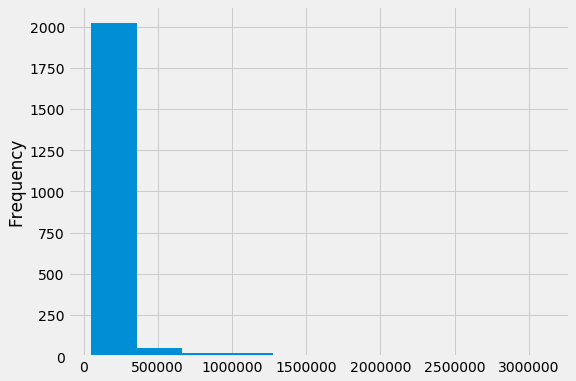

In [17]:
districts_new3.federal_revenue.plot(kind = 'hist')

The featueres are extremely right skewed; majority fundings are densed on small amount range, 
set up the data range 

In [18]:
districts_f = districts_new3[districts_new3.year > 1995 ]

In [19]:
districts_f.shape

(2057, 13)

In [20]:
naep.columns=('year', 'state', 'score', 'test_subject','grade')

In [21]:
naep.score = pd.to_numeric(naep['score'],errors='coerce')

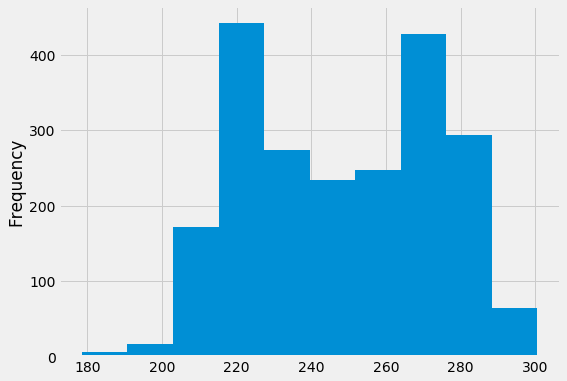

In [22]:
naep.score.plot(kind = 'hist') ##NAEP data are normaly  distributed

In [23]:

naep.head()

,year,state,score,test_subject,grade
0,2017,Alabama,232.170688,Mathematics,4
1,2017,Alaska,230.456278,Mathematics,4
2,2017,Arizona,234.435788,Mathematics,4
3,2017,Arkansas,233.848144,Mathematics,4
4,2017,California,232.262941,Mathematics,4


In [24]:
eduf = pd.merge(districts_new3, naep, on = ['year','state'])
eduf.head()

,year,state,name,enrollment,total_revenue,federal_revenue,state_revenue,local_revenue,expenditure,current_spending_instruction,current_spending,other_spending,total_capital,score,test_subject,grade
0,1994,California,LOS ANGELES CO OFF OF EDUCATION,0.0,329287.0,114874.0,124991.0,89422.0,334365.0,167855.0,109632.0,36397.0,6925.0,196.764414,Reading,4
1,1994,California,LOS ANGELES UNIF SCH DIST,639129.0,3813590.0,475847.0,2428837.0,908906.0,3533362.0,1979639.0,1044030.0,346101.0,163227.0,196.764414,Reading,4
2,1994,California,SAN DIEGO CITY UNIF SCH DIST,127258.0,735898.0,59809.0,297470.0,378619.0,719110.0,381526.0,248378.0,42792.0,46282.0,196.764414,Reading,4
3,1994,District of Columbia,DC PUBLIC SCHOOLS,80678.0,735720.0,79432.0,0.0,656288.0,769818.0,351028.0,332951.0,63271.0,22568.0,178.557612,Reading,4
4,1994,Florida,BROWARD CO SCHOOL DIST,189862.0,1217958.0,73252.0,617046.0,527660.0,1239525.0,536199.0,389744.0,85779.0,194480.0,204.882606,Reading,4


In [25]:
eduf.to_csv(r'data/edu_data.csv')

In [26]:
## total revenue, state revenue, adn expenditure are on odd range
## missing the unit information to transform the data
## suggest drop 

In [361]:
eduf.head()

,year,state,name,enrollment,total_revenue,federal_revenue,state_revenue,local_revenue,expenditure,current_spending_instruction,current_spending,other_spending,total_capital,score,test_subject,grade
0,1994,California,LOS ANGELES CO OFF OF EDUCATION,0.0,329287.0,114874.0,124991.0,89422.0,334365.0,167855.0,109632.0,36397.0,6925.0,196.764414,Reading,4
1,1994,California,LOS ANGELES UNIF SCH DIST,639129.0,3813590.0,475847.0,2428837.0,908906.0,3533362.0,1979639.0,1044030.0,346101.0,163227.0,196.764414,Reading,4
2,1994,California,SAN DIEGO CITY UNIF SCH DIST,127258.0,735898.0,59809.0,297470.0,378619.0,719110.0,381526.0,248378.0,42792.0,46282.0,196.764414,Reading,4
3,1994,District of Columbia,DC PUBLIC SCHOOLS,80678.0,735720.0,79432.0,0.0,656288.0,769818.0,351028.0,332951.0,63271.0,22568.0,178.557612,Reading,4
4,1994,Florida,BROWARD CO SCHOOL DIST,189862.0,1217958.0,73252.0,617046.0,527660.0,1239525.0,536199.0,389744.0,85779.0,194480.0,204.882606,Reading,4


##education EDA visualization

In [362]:
eduf.corr()

,year,enrollment,total_revenue,federal_revenue,state_revenue,local_revenue,expenditure,current_spending_instruction,current_spending,other_spending,total_capital,score,grade
year,1.000000,-0.176945,-0.039407,-0.024318,-0.058719,-0.019887,-0.042459,-0.027907,-0.057108,-0.091002,-0.079319,0.155699,0.019577
enrollment,-0.176945,1.000000,0.902879,0.868165,0.902086,0.815687,0.904216,0.860274,0.941326,0.951188,0.863639,-0.018320,-0.005029
total_revenue,-0.039407,0.902879,1.000000,0.917869,0.958876,0.952118,0.998196,0.988210,0.971238,0.911038,0.919154,0.007067,-0.000797
federal_revenue,-0.024318,0.868165,0.917869,1.000000,0.903667,0.816075,0.914874,0.884147,0.925755,0.898340,0.853129,-0.002246,-0.000416
state_revenue,-0.058719,0.902086,0.958876,0.903667,1.000000,0.829721,0.954947,0.928328,0.955879,0.918368,0.903232,-0.002641,-0.000915
local_revenue,-0.019887,0.815687,0.952118,0.816075,0.829721,1.000000,0.952827,0.964620,0.893302,0.810219,0.851853,0.017790,-0.000683
expenditure,-0.042459,0.904216,0.998196,0.914874,0.954947,0.952827,1.000000,0.990151,0.968666,0.909028,0.928376,0.007376,-0.000751
current_spending_instruction,-0.027907,0.860274,0.988210,0.884147,0.928328,0.964620,0.990151,1.000000,0.931292,0.860004,0.890561,0.011458,-0.000699
current_spending,-0.057108,0.941326,0.971238,0.925755,0.955879,0.893302,0.968666,0.931292,1.000000,0.950900,0.912316,0.003747,-0.001218
other_spending,-0.091002,0.951188,0.911038,0.898340,0.918368,0.810219,0.909028,0.860004,0.950900,1.000000,0.864929,-0.007847,-0.002775


##heat map indicated poor correlation between score and enrollment and features

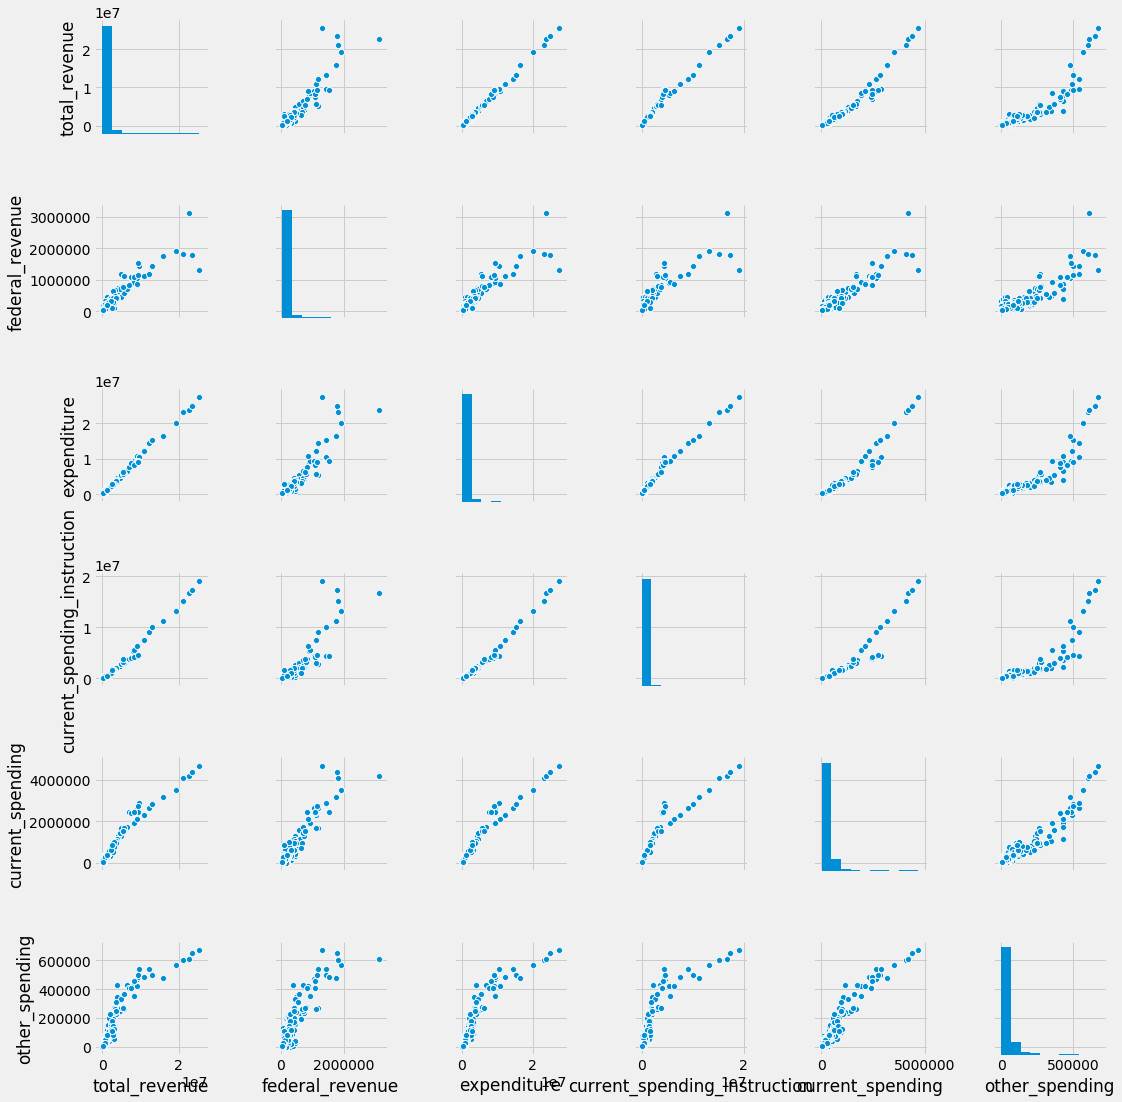

In [381]:
sns.pairplot(eduf[['total_revenue','federal_revenue','expenditure','current_spending_instruction','current_spending','other_spending']]) 

In [202]:
##feature EDA

In [33]:
by_year = eduf.groupby('year')['total_revenue','federal_revenue','expenditure','current_spending_instruction','current_spending','other_spending'].mean()

C:\Users\zhang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [27]:
plt.plot(by_year['total_revenue'], color='red')
plt.plot(by_year['federal_revenue'], color='orange', label='federal_revenue')
plt.plot(by_year['expenditure'], color='green')
plt.plot(by_year['current_spending_instruction'], color='blue')
plt.plot(by_year['current_spending'], color='grey')
plt.plot(by_year['other_spending'], color='black')
plt.legend(['total_revenue','federal_revenue','expenditure','current_spending_instruction','current_spending','other_spending'], loc = 1)
plt.grid(b=None)
plt.xlabel('year')
plt.ylabel('Revenue')
plt.title('All Features Growth by year')
plt.savefig('data/features_by_year.png', transparent=True,dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'by_year' is not defined

In [44]:
import matplotlib.ticker as mtick

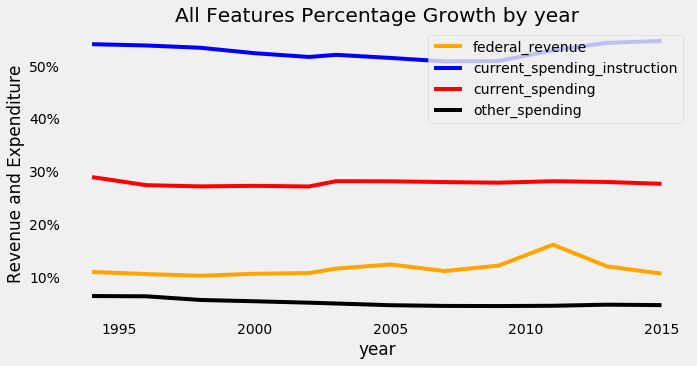

In [48]:
##percentage break down
by_year['current_spending_percentage'] = by_year['current_spending'] / by_year['expenditure']
by_year['federal_revenue_percentage'] = by_year['federal_revenue'] / by_year['total_revenue']
by_year['current_spending_instruction_percentage'] = by_year['current_spending_instruction'] / by_year['expenditure']
by_year['other_spending_percentage'] = by_year['other_spending'] / by_year['expenditure']
ax = plt.subplots(1, 1, figsize=(10,5))
p1 = plt.plot(by_year['federal_revenue_percentage'], color='orange', label='federal_revenue')
p2 = plt.plot(by_year['current_spending_instruction_percentage'], color='blue')
p3 = plt.plot(by_year['current_spending_percentage'], color='red')
p4 = plt.plot(by_year['other_spending_percentage'], color='black')
plt.legend(['federal_revenue','current_spending_instruction','current_spending','other_spending'], loc = 1)
plt.grid(b=None)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('year')
plt.ylabel('Revenue and Expenditure')
plt.title('All Features Percentage Growth by year')
plt.savefig('data/feature_pct.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\zhang\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


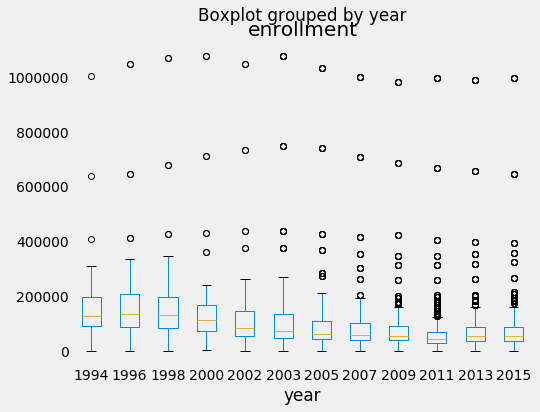

In [30]:
# Box plot of score, grouped by season
eduf.boxplot(column='enrollment', by='year')
plt.grid(b=None)
plt.savefig('data/enrollment_box.png', transparent=True,dpi=300, bbox_inches='tight')
plt.show()

In [74]:
##scatter plots of all correlation
feature_cols =['total_revenue','federal_revenue','state_revenue','expenditure','current_spending_instruction','current_spending','other_spending','total_capital']

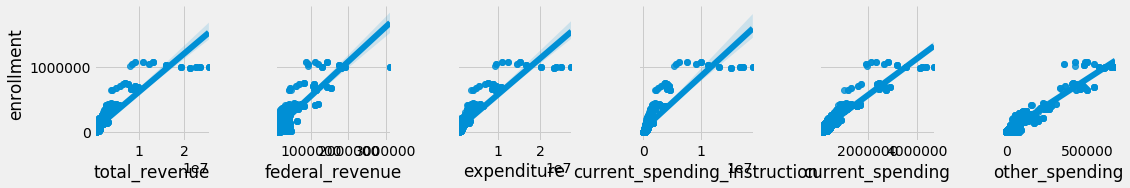

In [383]:
sns.pairplot(eduf, x_vars=feature_cols, y_vars='enrollment', kind='reg');
plt.grid(b=None)
plt.savefig('data/enrollment_corr.png', transparent=True,dpi=300, bbox_inches='tight')
plt.show()

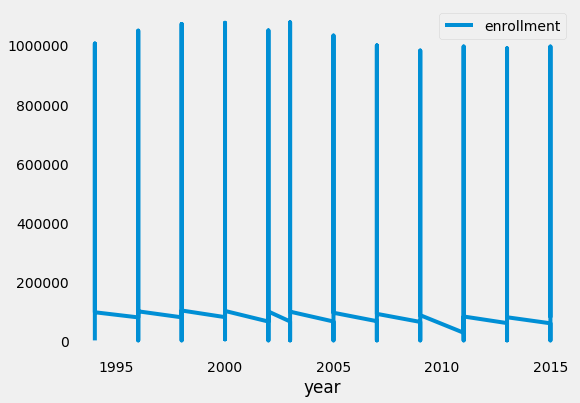

In [380]:
fig = eduf.plot(x ='year', y = 'enrollment', kind = 'line', markerfacecolor=None);
plt.grid(b=None)
plt.savefig('data/enrollment_by_year.png', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

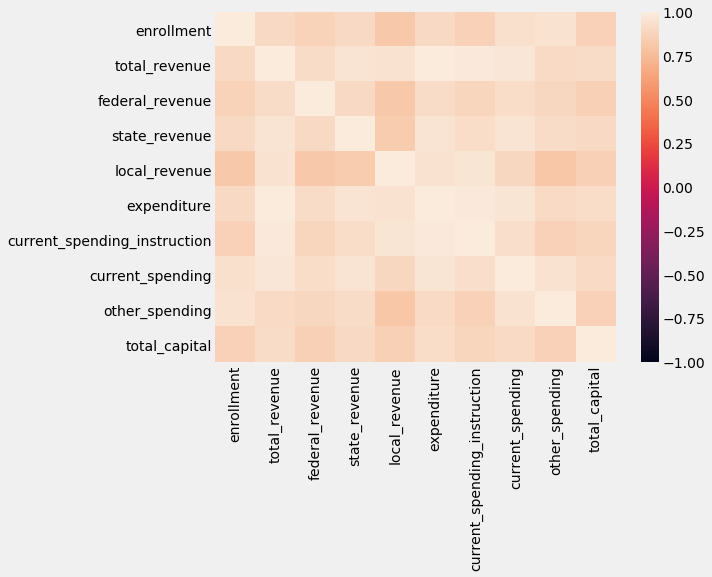

In [372]:
sns.heatmap(eduf.drop(['year', 'score','grade'],axis = 1).corr(), vmin=-1, vmax=1)
plt.savefig('data/heatmap.png', transparent=True,dpi=300, bbox_inches='tight')
plt.grid(b=None)
plt.show()

In [75]:
# Create X and y.
X = eduf[feature_cols]
y = eduf.enrollment

In [390]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
pdf.output("data/regression.pdf")

                            OLS Regression Results                            
Dep. Variable:             enrollment   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     7784.
Date:                Sat, 13 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:41:33   Log-Likelihood:                -45890.
No. Observations:                3855   AIC:                         9.179e+04
Df Residuals:                    3848   BIC:                         9.184e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

NameError: name 'pdf' is not defined

In [77]:
##scatter plots of all correlation
feature_cols1 =['total_revenue','federal_revenue','expenditure','current_spending_instruction','current_spending','other_spending']

In [78]:
##build linear regression for prediction

In [79]:
X = eduf[feature_cols1]
y = eduf.enrollment

In [268]:
X.describe()

,total_revenue,federal_revenue,expenditure,current_spending_instruction,current_spending,other_spending
count,3.855000e+03,3.855000e+03,3.855000e+03,3.855000e+03,3.855000e+03,3855.000000
mean,1.079346e+06,1.325096e+05,1.107774e+06,5.827077e+05,3.089959e+05,52587.742672
std,1.989207e+06,2.122858e+05,2.131881e+06,1.375229e+06,4.353089e+05,76292.536175
min,7.708900e+04,5.001900e+04,3.525100e+04,8.220000e+02,1.801900e+04,0.000000
25%,4.392340e+05,6.074900e+04,4.355470e+05,2.242330e+05,1.318020e+05,21889.000000
50%,6.131440e+05,7.725900e+04,6.211730e+05,3.122830e+05,1.921970e+05,32380.000000
75%,1.065630e+06,1.138840e+05,1.062236e+06,5.418120e+05,3.224060e+05,51355.000000
max,2.543738e+07,3.120314e+06,2.747789e+07,1.903582e+07,4.694906e+06,673464.000000


In [269]:
y.isnull().sum()

0

In [270]:
y.fillna(0, inplace=True)

In [271]:
X.isnull().sum()

total_revenue                   0
federal_revenue                 0
expenditure                     0
current_spending_instruction    0
current_spending                0
other_spending                  0
dtype: int64

In [272]:
print((X.dtypes))

total_revenue                   float64
federal_revenue                 float64
expenditure                     float64
current_spending_instruction    float64
current_spending                float64
other_spending                  float64
dtype: object


In [273]:
print((X.shape))

(3855, 6)


In [274]:
y.describe

<bound method NDFrame.describe of 0            0.0
1       639129.0
2       127258.0
3        80678.0
4       189862.0
          ...   
3850     12650.0
3851     77316.0
3852     77316.0
3853     77316.0
3854     77316.0
Name: enrollment, Length: 3855, dtype: float64>

In [275]:
X.corr()

,total_revenue,federal_revenue,expenditure,current_spending_instruction,current_spending,other_spending
total_revenue,1.000000,0.917869,0.998196,0.988210,0.971238,0.911038
federal_revenue,0.917869,1.000000,0.914874,0.884147,0.925755,0.898340
expenditure,0.998196,0.914874,1.000000,0.990151,0.968666,0.909028
current_spending_instruction,0.988210,0.884147,0.990151,1.000000,0.931292,0.860004
current_spending,0.971238,0.925755,0.968666,0.931292,1.000000,0.950900
other_spending,0.911038,0.898340,0.909028,0.860004,0.950900,1.000000


In [276]:
# Check y's type.
print(type(y))

<class 'pandas.core.series.Series'>


In [277]:
print((y.shape))

(3855,)


In [278]:
## 4 steps
## initiate
## training 
## predict
## evaluate

In [93]:
Xs = eduf[['total_revenue','federal_revenue','expenditure','current_spending_instruction','current_spending','other_spending']]
y = eduf['enrollment']
lr = LinearRegression()
lr.fit(Xs, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [279]:
from sklearn.linear_model import LinearRegression

In [92]:
print(lr.intercept_)
print(lr.coef_)

4230.326308517164
[-0.07238651 -0.0502455   0.04932558  0.01592084  0.17267962  1.02548782]


In [125]:
x_train, x_test,y_train,y_test = train_test_split(X,y,random_state = 123)
y_pred = lr.predict(X)
X_pred = lr.predict(X)

In [109]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
## calcuate the accuracy
lr.score(x_test,y_test)

0.900831053664841

In [141]:
from sklearn.model_selection import train_test_split

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(eduf, feature_cols1):
    X = gpa1[feature_cols]
    y = gpa1.gpa
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(true, pred))
            

In [ ]:
from sklearn.model_selection import train_test_split

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_mae(eduf, feature_cols1):
    X = gpa1[feature_cols]
    y = gpa1.gpa
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return metrics.mean_absolute_error(y_test, y_pred)

In [140]:
# Compare different sets of features.
print(train_test_rmse(eduf, ['total_revenue','federal_revenue','expenditure','current_spending_instruction','current_spending','other_spending']))
print(train_test_rmse(eduf, ['total_revenue', 'federal_revenue','current_spending','current_spending_instruction','other_spending']))
print(train_test_rmse(eduf, ['total_revenue', 'current_spending', 'expenditure']))

30726.187375168993
30554.656132892174
34903.17143826005


In [150]:
print(train_test_mae(eduf, ['total_revenue','federal_revenue','expenditure','current_spending_instruction','current_spending','other_spending']))
print(train_test_mae(eduf, ['total_revenue', 'federal_revenue','current_spending','current_spending_instruction','other_spending']))
print(train_test_mae(eduf, ['total_revenue', 'current_spending', 'expenditure']))

19979.203553974072
20158.043316193853
22607.78278364976


In [305]:
## RMSEA reduced wtih more features

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

y_null = np.zeros_like(y_test, dtype=float)

y_null.fill(y_test.mean())
y_null

array([83227.40975104, 83227.40975104, 83227.40975104, 83227.40975104,
       83227.40975104, 83227.40975104, 83227.40975104, 83227.40975104,
       83227.40975104, 83227.40975104, 83227.40975104, 83227.40975104,
       83227.40975104, 83227.40975104, 83227.40975104, 83227.40975104,
       83227.40975104, 83227.40975104, 83227.40975104, 83227.40975104,
       83227.40975104, 83227.40975104, 83227.40975104, 83227.40975104,
       83227.40975104, 83227.40975104, 83227.40975104, 83227.40975104,
       83227.40975104, 83227.40975104, 83227.40975104, 83227.40975104,
       83227.40975104, 83227.40975104, 83227.40975104, 83227.40975104,
       83227.40975104, 83227.40975104, 83227.40975104, 83227.40975104,
       83227.40975104, 83227.40975104, 83227.40975104, 83227.40975104,
       83227.40975104, 83227.40975104, 83227.40975104, 83227.40975104,
       83227.40975104, 83227.40975104, 83227.40975104, 83227.40975104,
       83227.40975104, 83227.40975104, 83227.40975104, 83227.40975104,
      

In [115]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

97571.0155302958

## Ridge Regression

In [423]:
revenue_dummies = pd.get_dummies(districts_f.total_revenue)

In [424]:
districts_dummies = pd.concat([districts_f, revenue_dummies], axis=1)

In [425]:
X = districts_dummies[feature_cols]
y = districts_dummies.enrollment

linreg = LinearRegression()
linreg.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

ridge regression

In [ ]:
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [430]:
y_pred = ridgereg.predict(X)

In [435]:
print(ridgereg.intercept_)

10886.08329776775


In [298]:
list(zip(feature_cols, ridgereg.coef_))

[('total_revenue', -0.07844183321424758),
 ('federal_revenue', -0.06983128027489204),
 ('expenditure', 0.074294423126399),
 ('current_spending_instruction', -0.0047588651012720655),
 ('current_spending', 0.14513856086261095),
 ('other_spending', 1.0430108861542022)]

In [433]:
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

41640.4232288643


In [126]:
list(zip(feature_cols, ridgereg.coef_))

[('total_revenue', 0.002614288254853433),
 ('federal_revenue', 0.0172038925711048),
 ('state_revenue', 0.014514305171092002),
 ('expenditure', 0.004149895352522794),
 ('current_spending_instruction', -0.0017976188683634198),
 ('current_spending', 0.06633619271346432),
 ('other_spending', 0.6739851697829419),
 ('total_capital', 0.06761253149194939)]

Conclusion
The total revenue,state_revenue,federal_revenue, enrollment, current_spending, and expenditure are the strong predictors for enrollments. 
The multicolinearity are also detected on the heatmap.
Tuning the KNN model help improve the model evaluation and reduce the testing error. 
By scale the training and testing data, the testing error reduced although the overall model fits not actually improved. 